## Importing necessary libraries

In [394]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 


In [395]:
pwd


'C:\\Users\\rajka\\Business Forecasting 2024'

## Data Preprocessing

In [397]:
df = pd.read_excel('Adidas US Sales Datasets.xlsx', skiprows = 4)

In [398]:
df.head(10)

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,NaN,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,NaN,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,NaN,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,NaN,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,NaN,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [399]:
df.drop(df.columns[0], axis=1, inplace=True)

In [400]:
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [401]:
df.shape

(9648, 13)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [403]:
df.duplicated().sum()

0

In [404]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [405]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [406]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [407]:
type('Invoice Date')

str

In [408]:
parts = df["Invoice Date"].astype(str).str.split("-", n = 3, expand = True) 
df["year"]= parts[0].astype('int') 
df["month"]= parts[1].astype('int') 
df["day"]= parts[2].astype('int') 
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5


In [409]:
from datetime import datetime 
import calendar 

def weekend_or_weekday(year,month,day): 

    d = datetime(year,month,day) 
    if d.weekday()>4: 
        return 1
    else: 
        return 0

df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1) 
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekend
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,1


In [410]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [411]:
from datetime import date 
import holidays 

def is_holiday(x): 

    india_holidays = holidays.country_holidays('IN') 

    if india_holidays.get(x): 
        return 1
    else: 
        return 0

df['holidays'] = df['Invoice Date'].apply(is_holiday) 
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekend,holidays
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,0,0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,0,0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,0,0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,1,0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,1,0


In [412]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12)) 
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12)) 
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekend,holidays,m1,m2
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,0,0,0.5,0.866025
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,0,0,0.5,0.866025
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,0,0,0.5,0.866025
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,1,0,0.5,0.866025
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,1,0,0.5,0.866025


In [413]:
def which_day(year, month, day): 
      
    d = datetime(year,month,day) 
    return d.weekday() 
  
df['weekday'] = df.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1) 
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekend,holidays,m1,m2,weekday
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,0,0,0.5,0.866025,2
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,0,0,0.5,0.866025,3
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,0,0,0.5,0.866025,4
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,1,0,0.5,0.866025,5
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,1,0,0.5,0.866025,6


In [414]:
pd.set_option('display.max_columns', None)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekend,holidays,m1,m2,weekday
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,0,0,0.5,0.866025,2
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,0,0,0.5,0.866025,3
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,0,0,0.5,0.866025,4
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,1,0,0.5,0.866025,5
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,1,0,0.5,0.866025,6


In [415]:
df = df[['Retailer','Retailer ID','Invoice Date','Product','Price per Unit','Units Sold','Total Sales','year','month','day','weekend','holidays','m1','m2','weekday']]


In [416]:
df.head()

,Retailer,Retailer ID,Invoice Date,Product,Price per Unit,Units Sold,Total Sales,year,month,day,weekend,holidays,m1,m2,weekday
0,Foot Locker,1185732,2020-01-01,Men's Street Footwear,50.0,1200,600000.0,2020,1,1,0,0,0.5,0.866025,2
1,Foot Locker,1185732,2020-01-02,Men's Athletic Footwear,50.0,1000,500000.0,2020,1,2,0,0,0.5,0.866025,3
2,Foot Locker,1185732,2020-01-03,Women's Street Footwear,40.0,1000,400000.0,2020,1,3,0,0,0.5,0.866025,4
3,Foot Locker,1185732,2020-01-04,Women's Athletic Footwear,45.0,850,382500.0,2020,1,4,1,0,0.5,0.866025,5
4,Foot Locker,1185732,2020-01-05,Men's Apparel,60.0,900,540000.0,2020,1,5,1,0,0.5,0.866025,6


In [417]:
df.drop('Invoice Date', axis=1, inplace=True)

In [418]:
df.head()

,Retailer,Retailer ID,Product,Price per Unit,Units Sold,Total Sales,year,month,day,weekend,holidays,m1,m2,weekday
0,Foot Locker,1185732,Men's Street Footwear,50.0,1200,600000.0,2020,1,1,0,0,0.5,0.866025,2
1,Foot Locker,1185732,Men's Athletic Footwear,50.0,1000,500000.0,2020,1,2,0,0,0.5,0.866025,3
2,Foot Locker,1185732,Women's Street Footwear,40.0,1000,400000.0,2020,1,3,0,0,0.5,0.866025,4
3,Foot Locker,1185732,Women's Athletic Footwear,45.0,850,382500.0,2020,1,4,1,0,0.5,0.866025,5
4,Foot Locker,1185732,Men's Apparel,60.0,900,540000.0,2020,1,5,1,0,0.5,0.866025,6


In [419]:
df['Retailer'].nunique(), df['Product'].nunique()

(6, 6)

## Data Viz.

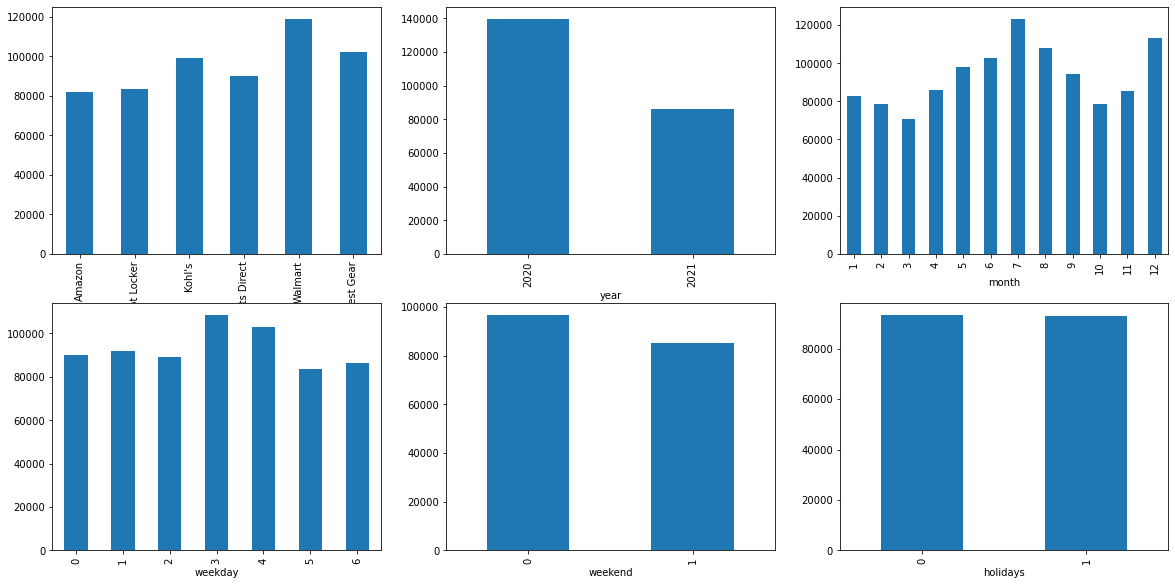

In [420]:
features = ['Retailer', 'year', 'month','weekday', 'weekend', 'holidays'] 
  
plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    df.groupby(col).mean()['Total Sales'].plot.bar() 
plt.show() 

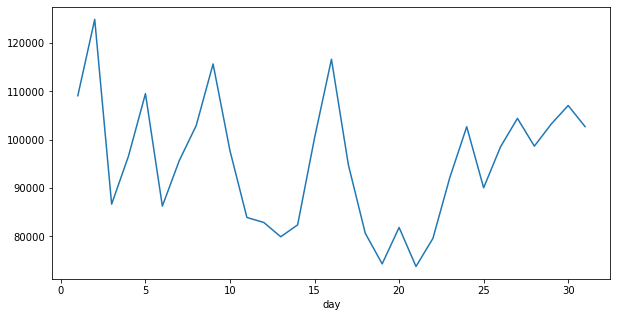

In [421]:
plt.figure(figsize=(10,5)) 
df.groupby('day').mean()['Total Sales'].plot() 
plt.show()

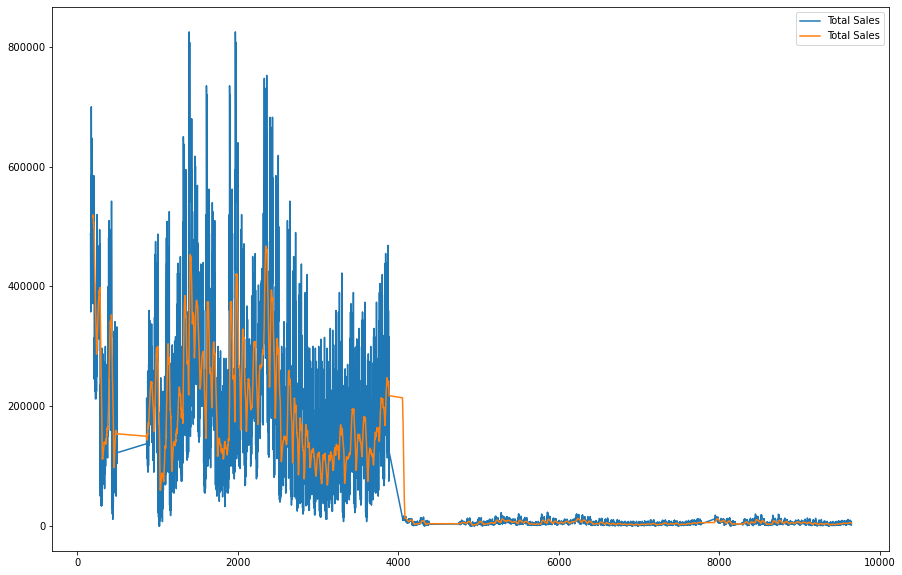

In [422]:
plt.figure(figsize=(15, 10)) 

# Calculating Simple Moving Average 
# for a window period of 30 days 
window_size = 30
data = df[df['year']==2021] 
windows = data['Total Sales'].rolling(window_size) 
sma = windows.mean() 
sma = sma[window_size - 1:] 

data['Total Sales'].plot() 
sma.plot() 
plt.legend() 
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


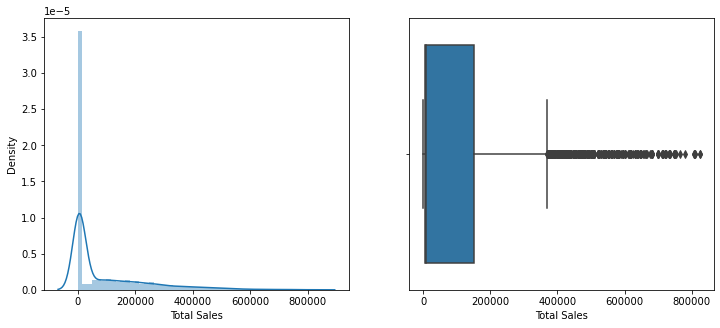

In [423]:
plt.subplots(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
sb.distplot(df['Total Sales']) 

plt.subplot(1, 2, 2) 
sb.boxplot(df['Total Sales']) 
plt.show() 


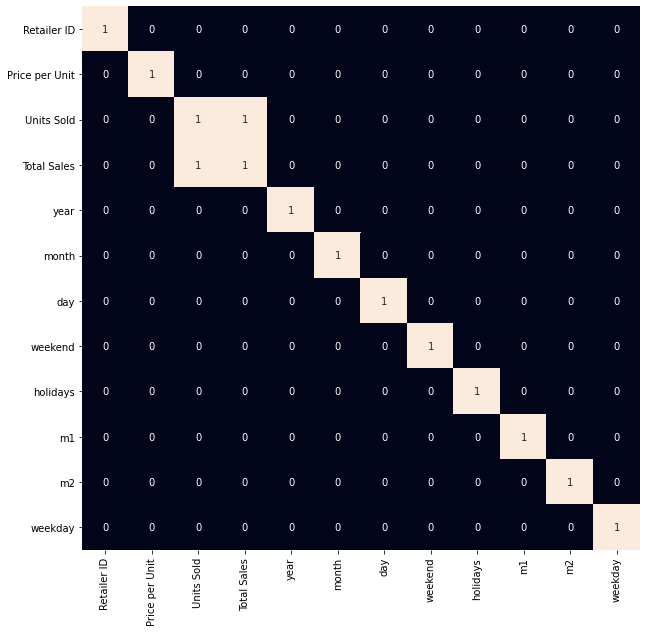

In [424]:
plt.figure(figsize=(10, 10)) 
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False) 
plt.show() 


In [425]:
df = df[df['Total Sales']<300000]
df

,Retailer,Retailer ID,Product,Price per Unit,Units Sold,Total Sales,year,month,day,weekend,holidays,m1,m2,weekday
68,Sports Direct,1197831,Men's Street Footwear,25.0,900,225000.0,2020,7,19,1,0,-0.500000,-0.866025,6
70,Sports Direct,1197831,Women's Street Footwear,35.0,700,245000.0,2020,7,21,0,0,-0.500000,-0.866025,1
71,Sports Direct,1197831,Women's Athletic Footwear,35.0,700,245000.0,2020,7,22,0,0,-0.500000,-0.866025,2
72,Sports Direct,1197831,Men's Apparel,40.0,550,220000.0,2020,7,23,0,0,-0.500000,-0.866025,3
73,Sports Direct,1197831,Women's Apparel,35.0,700,245000.0,2020,7,24,0,0,-0.500000,-0.866025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,Men's Apparel,50.0,64,3200.0,2021,1,24,1,0,0.500000,0.866025,6
9644,Foot Locker,1185732,Women's Apparel,41.0,105,4305.0,2021,1,24,1,0,0.500000,0.866025,6
9645,Foot Locker,1185732,Men's Street Footwear,41.0,184,7544.0,2021,2,22,0,0,0.866025,0.500000,0
9646,Foot Locker,1185732,Men's Athletic Footwear,42.0,70,2940.0,2021,2,22,0,0,0.866025,0.500000,0


In [426]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score


In [427]:
# features = df.drop(['Total Sales', 'year', 'Retailer','Retailer ID', 'Product'], axis=1) 
# target = df['Total Sales'].values

In [428]:
# target

In [429]:
# features

In [430]:
# X- independent variable
X = df.iloc[:,3:5]
X

,Price per Unit,Units Sold
68,25.0,900
70,35.0,700
71,35.0,700
72,40.0,550
73,35.0,700
...,...,...
9643,50.0,64
9644,41.0,105
9645,41.0,184
9646,42.0,70


In [431]:
Y = df.iloc[:,5:6]
Y

,Total Sales
68,225000.0
70,245000.0
71,245000.0
72,220000.0
73,245000.0
...,...
9643,3200.0
9644,4305.0
9645,7544.0
9646,2940.0


In [432]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2) 
X_train.shape, X_test.shape

((6920, 2), (1731, 2))

In [433]:
X_train.head()

,Price per Unit,Units Sold
8660,46.0,173
9364,27.0,45
2009,30.0,475
1752,25.0,350
8943,43.0,184


In [434]:
 X_test.head()

,Price per Unit,Units Sold
5003,44.0,173
9612,42.0,88
4990,15.0,173
7951,60.0,306
8388,35.0,179


In [435]:
# # Normalizing the features for stable and fast training. 
# scaler = StandardScaler() 
# X_train = scaler.fit_transform(X_train) 
# X_test = scaler.transform(X_test)


In [436]:
Y_train.shape

(6920, 1)

In [437]:
X_train.shape


(6920, 2)

## SLR

In [438]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [439]:
mlr.coef_

array([[996.34860242, 467.86091841]])

In [440]:
mlr.intercept_

array([-84373.56407556])

In [441]:
Y_pred = mlr.predict(X_test)

In [442]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

74.46792120064892

## MLR

In [443]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)

In [444]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(X_train_poly, Y_train)

LinearRegression()

In [445]:
Y_pred = pr.predict(X_test_poly)

In [446]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

86.2415567344313

## LR, LASSO, RIDGE

In [456]:
models = [LinearRegression(), Lasso(), Ridge()] 

for i in range(3): 
    models[i].fit(X_train, Y_train) 
    print(f'{models[i]} : ') 

    train_preds = models[i].predict(X_train) 
    print('Training Accuracy : ', r2_score(Y_train, train_preds)*100) 

    val_preds = models[i].predict(X_test) 
    print('Validation : ', r2_score(Y_test, val_preds)*100) 
    print() 


LinearRegression() : 
Training Accuracy :  75.59226260137328
Validation :  74.46792120064892

Lasso() : 
Training Accuracy :  75.5922626012916
Validation :  74.46791912416988

Ridge() : 
Training Accuracy :  75.5922626013716
Validation :  74.46792087056295



## RFR

In [457]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, Y_train)

<ipython-input-457-f852621c6ae9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=50)

In [458]:
Y_pred=rfr.predict(X_test)

In [459]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

97.69017102204283

## DTR

In [461]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [462]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [463]:
Y_pred=dtr.predict(X_test)


In [464]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

98.24096649652587